# Face Detection

The first document in the series focuses on creating the face detection components.

## Setup

In [2]:
# Install before if needed, see requirements.txt for versions
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Create a data directory if it doesn't exist
os.makedirs('data/faces', exist_ok=True)

## Face Detector Model

We opted to use the OpenCV model for this section of our project:

In [3]:
# for usability :)
print("Downloading face detection model...")

# Create a models directory
os.makedirs('models', exist_ok=True)

model_file = "models/haarcascade_frontalface_default.xml"

# Only download if it doesn't exist
if not os.path.exists(model_file):
    print(f"Downloading face detector to {model_file}")
    url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"
    
    # Using urllib to download the file
    import urllib.request
    urllib.request.urlretrieve(url, model_file)
    print("Download complete!")
else:
    print("Face detector already downloaded.")

Download complete!


## Detect Faces

This section will use our downloaded model to detect the faces in the sample image!

In [4]:
# first, we're going to create a functino for detectin gfaces
def detect_faces(image_path):
    """
    Detect faces in an image using OpenCV's Haar Cascade
    
    Args:
        image_path: Path to the input image
        
    Returns:
        faces: List of face images
        bboxes: List of bounding boxes [x, y, w, h]
        original_image: The original image with faces marked
    """
    # Load the face detector
    face_cascade = cv2.CascadeClassifier('models/haarcascade_frontalface_default.xml')
    
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Could not read image from {image_path}")
        return [], [], None
    
    # Convert to RGB for display and grayscale for detection
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Detect faces
    faces_rect = face_cascade.detectMultiScale(
        gray, 
        scaleFactor=1.1, 
        minNeighbors=5,
        minSize=(30, 30)
    )
    
    # Process detected faces
    faces = []
    bboxes = []
    
    for (x, y, w, h) in faces_rect:
        # Extract the face region
        face_roi = image_rgb[y:y+h, x:x+w]
        
        # Save information
        faces.append(face_roi)
        bboxes.append([x, y, x+w, y+h])  # Convert to [x1, y1, x2, y2] format
    
    return faces, bboxes, image_rgb

In [12]:
sample_path = 'C:/Users/jaden/Documents/GitHub/TECHIN-513/finalProject3/data/test_images/group_photo1.jpg'

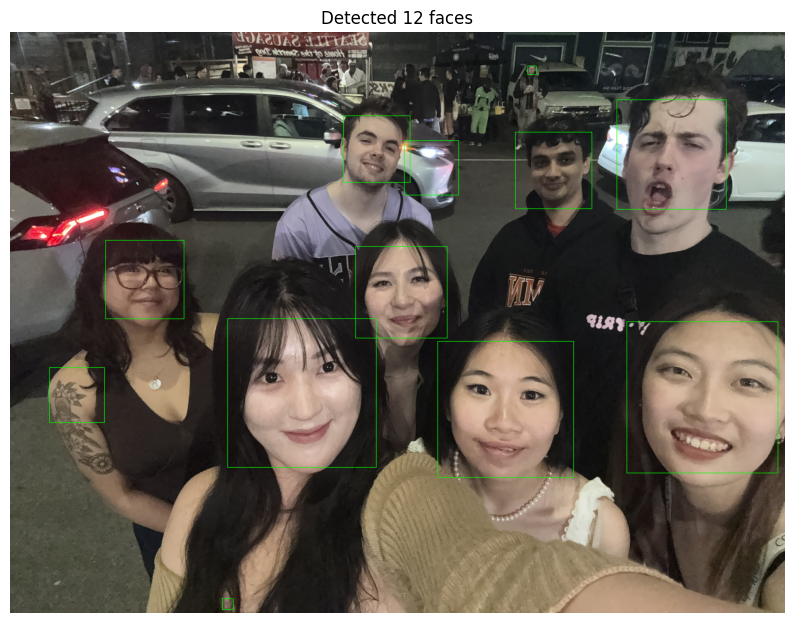

In [13]:
# Detect faces in the sample image
faces, bboxes, image = detect_faces(sample_path)

# Display the original image with face bounding boxes
plt.figure(figsize=(10, 8))
for (x1, y1, x2, y2) in bboxes:
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(image)
plt.title(f"Detected {len(faces)} faces")
plt.axis('off')
plt.show()


## Multiple Faces Extraction

Lastly, we're going to create a function to extract the faces out of the images for future usage. We will then use it on the same sample image as before.

In [14]:
# Step 4: Create a function to extract faces from any image
def extract_faces_from_image(image_path, output_dir=None):
    """
    Detect faces in an image and optionally save them to disk
    """
    # Detect faces
    faces, bboxes, image = detect_faces(image_path)
    
    # Create output directory if provided
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
        
        # Save individual faces
        for i, face in enumerate(faces):
            face_path = f"{output_dir}/face_{i}.jpg"
            cv2.imwrite(face_path, cv2.cvtColor(face, cv2.COLOR_RGB2BGR))
            print(f"Saved face {i} to {face_path}")
    
    # Return the faces and their positions
    return faces, bboxes, image

Saved face 0 to data/faces/extracted/face_0.jpg
Saved face 1 to data/faces/extracted/face_1.jpg
Saved face 2 to data/faces/extracted/face_2.jpg
Saved face 3 to data/faces/extracted/face_3.jpg
Saved face 4 to data/faces/extracted/face_4.jpg
Saved face 5 to data/faces/extracted/face_5.jpg
Saved face 6 to data/faces/extracted/face_6.jpg
Saved face 7 to data/faces/extracted/face_7.jpg
Saved face 8 to data/faces/extracted/face_8.jpg
Saved face 9 to data/faces/extracted/face_9.jpg
Saved face 10 to data/faces/extracted/face_10.jpg
Saved face 11 to data/faces/extracted/face_11.jpg
Extracted 12 faces and saved them to data/faces/extracted


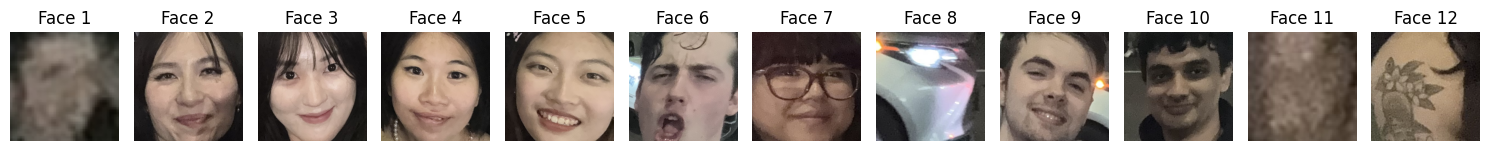

In [15]:
# sample test
output_dir = 'data/faces/extracted'
faces, bboxes, _ = extract_faces_from_image(sample_path, output_dir)

print(f"Extracted {len(faces)} faces and saved them to {output_dir}")

# Display the extracted faces
plt.figure(figsize=(15, 3))
for i, face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face)
    plt.title(f"Face {i+1}")
    plt.axis('off')
plt.tight_layout()
plt.show()